# Importing of various libraries of Data analysis of Well Logs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan as NA
import sklearn
import seaborn as sns
import xlrd
import openpyxl

%matplotlib inline

In [2]:
datasete = pd.ExcelFile("C:\\Users\\Toyin Obasoro\Desktop\\Kunle practise\\RES (Autosaved) (Autosaved) - Copy.xlsx")

In [3]:
datasete

In [4]:
dataset = datasete.parse("GOM")

In [5]:
dataset.head()

,Density(g/cc),Depth(ft),g,Sv,HPore Pressure,Overburden Pressure,Porosity Calculated,Theoritical Porosity,Over Pressure,Calculated Pore Pressure,Pressure Gradient
0,1.000,0,NaN,0.0,0.000000,0.000000,1.000000,0.400000,0.000000,0.000000,NaN
1,1.000,1000,10.0,10000.0,433.233525,433.233525,1.000000,0.400000,-0.000025,433.233500,0.433234
2,1.800,1001,10.0,18018.0,433.233525,434.013345,0.529412,0.399938,1402.289646,1835.523171,0.433580
3,1.800,3514,10.0,63252.0,1522.382607,2393.701872,0.529412,0.336030,2272.829091,3795.211698,0.681190
4,2.154,3515,10.0,75713.1,1522.815840,2394.635057,0.321176,0.335996,-225.549895,1297.265945,0.681262


In [6]:
dataset.isnull().sum()

Density(g/cc)               0
Depth(ft)                   0
g                           1
Sv                          0
HPore Pressure              0
Overburden Pressure         0
Porosity Calculated         0
Theoritical Porosity        0
Over Pressure               2
Calculated Pore Pressure    2
Pressure Gradient           1
dtype: int64

In [7]:
dataset['g'].fillna(dataset['g'].mean(), inplace=True)
dataset['Over Pressure'].fillna(dataset['Over Pressure'].mean(), inplace=True)
dataset['Calculated Pore Pressure'].fillna(dataset['Calculated Pore Pressure'].mean(), inplace=True)
dataset['Pressure Gradient'].fillna(dataset['Pressure Gradient'].mean(), inplace=True)

for x in dataset.columns:
    print(x, dataset[x].isnull().values.any())

Density(g/cc) False
Depth(ft) False
g False
Sv False
HPore Pressure False
Overburden Pressure False
Porosity Calculated False
Theoritical Porosity False
Over Pressure False
Calculated Pore Pressure False
Pressure Gradient False


In [8]:
dataset.head()

,Density(g/cc),Depth(ft),g,Sv,HPore Pressure,Overburden Pressure,Porosity Calculated,Theoritical Porosity,Over Pressure,Calculated Pore Pressure,Pressure Gradient
0,1.000,0,10.0,0.0,0.000000,0.000000,1.000000,0.400000,0.000000,0.000000,0.811549
1,1.000,1000,10.0,10000.0,433.233525,433.233525,1.000000,0.400000,-0.000025,433.233500,0.433234
2,1.800,1001,10.0,18018.0,433.233525,434.013345,0.529412,0.399938,1402.289646,1835.523171,0.433580
3,1.800,3514,10.0,63252.0,1522.382607,2393.701872,0.529412,0.336030,2272.829091,3795.211698,0.681190
4,2.154,3515,10.0,75713.1,1522.815840,2394.635057,0.321176,0.335996,-225.549895,1297.265945,0.681262


In [9]:
dataset1 = datasete.parse("Barne shale")

In [10]:
dataset1.head()

,Density(g/cc),Depth(ft),g=10,OverBurden,Pore Pressure,Porosity,Pore Pressure Gradient
0,1.9000,0.0,9.8,0.000000,0.000000,0.470588,0.000000
1,1.9000,94.0,9.8,77.355375,40.723951,0.470588,40.713355
2,1.8778,95.0,9.8,77.264853,41.157185,0.483647,41.146476
3,1.8778,95.5,9.8,77.671510,41.373802,0.483647,41.363036
4,1.8778,96.0,9.8,78.078167,41.590418,0.483647,41.579597


# Data Cleaning and Wrangling

In [11]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Density(g/cc),9590.0,2.277153,0.114170,1.000000,2.194000,2.266000,2.358000,3.188000
Depth(ft),9590.0,8304.610010,2770.549008,0.000000,5908.250000,8305.500000,10702.750000,13100.000000
g,9590.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
Sv,9590.0,191492.499647,70928.849788,0.000000,128125.415000,189873.210000,249901.105000,417086.040000
HPore Pressure,9590.0,3597.835423,1200.294832,0.000000,2559.651974,3598.221041,4636.790109,5675.359176
Overburden Pressure,9590.0,6864.400064,2584.967802,0.000000,4627.980088,6865.057860,9102.135632,11339.213403
Porosity Calculated,9590.0,0.248734,0.067159,-0.287059,0.201176,0.255294,0.297647,1.000000
Theoritical Porosity,9590.0,0.216202,0.059446,0.128856,0.163759,0.208116,0.264489,0.400000
Over Pressure,9590.0,684.989768,1049.603795,-16557.401279,2.913968,683.277958,1310.693719,4304.010584
Calculated Pore Pressure,9590.0,4282.393413,1783.049985,-10888.973839,3105.422929,4322.292833,5428.501318,9751.922160


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 11 columns):
Density(g/cc)               9590 non-null float64
Depth(ft)                   9590 non-null int64
g                           9590 non-null float64
Sv                          9590 non-null float64
HPore Pressure              9590 non-null float64
Overburden Pressure         9590 non-null float64
Porosity Calculated         9590 non-null float64
Theoritical Porosity        9590 non-null float64
Over Pressure               9590 non-null float64
Calculated Pore Pressure    9590 non-null float64
Pressure Gradient           9590 non-null float64
dtypes: float64(10), int64(1)
memory usage: 824.3 KB


In [13]:
print(dataset.iloc[0:5])

   Density(g/cc)  Depth(ft)     g       Sv  HPore Pressure  \
0          1.000          0  10.0      0.0        0.000000   
1          1.000       1000  10.0  10000.0      433.233525   
2          1.800       1001  10.0  18018.0      433.233525   
3          1.800       3514  10.0  63252.0     1522.382607   
4          2.154       3515  10.0  75713.1     1522.815840   

   Overburden Pressure  Porosity Calculated  Theoritical Porosity  \
0             0.000000             1.000000              0.400000   
1           433.233525             1.000000              0.400000   
2           434.013345             0.529412              0.399938   
3          2393.701872             0.529412              0.336030   
4          2394.635057             0.321176              0.335996   

   Over Pressure  Calculated Pore Pressure  Pressure Gradient  
0       0.000000                  0.000000           0.811549  
1      -0.000025                433.233500           0.433234  
2    1402.289646    

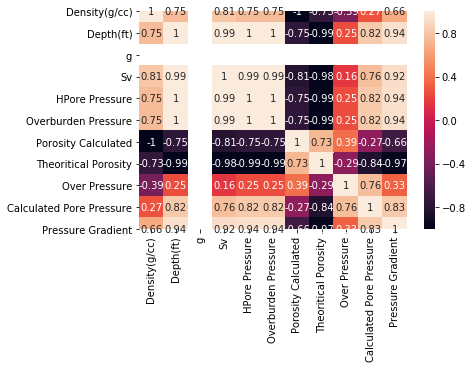

In [14]:
dataset_corr = dataset.corr()
sns.heatmap(dataset_corr, xticklabels=dataset_corr.columns, yticklabels=dataset_corr.columns, annot=True)

NameError: name 'save' is not defined

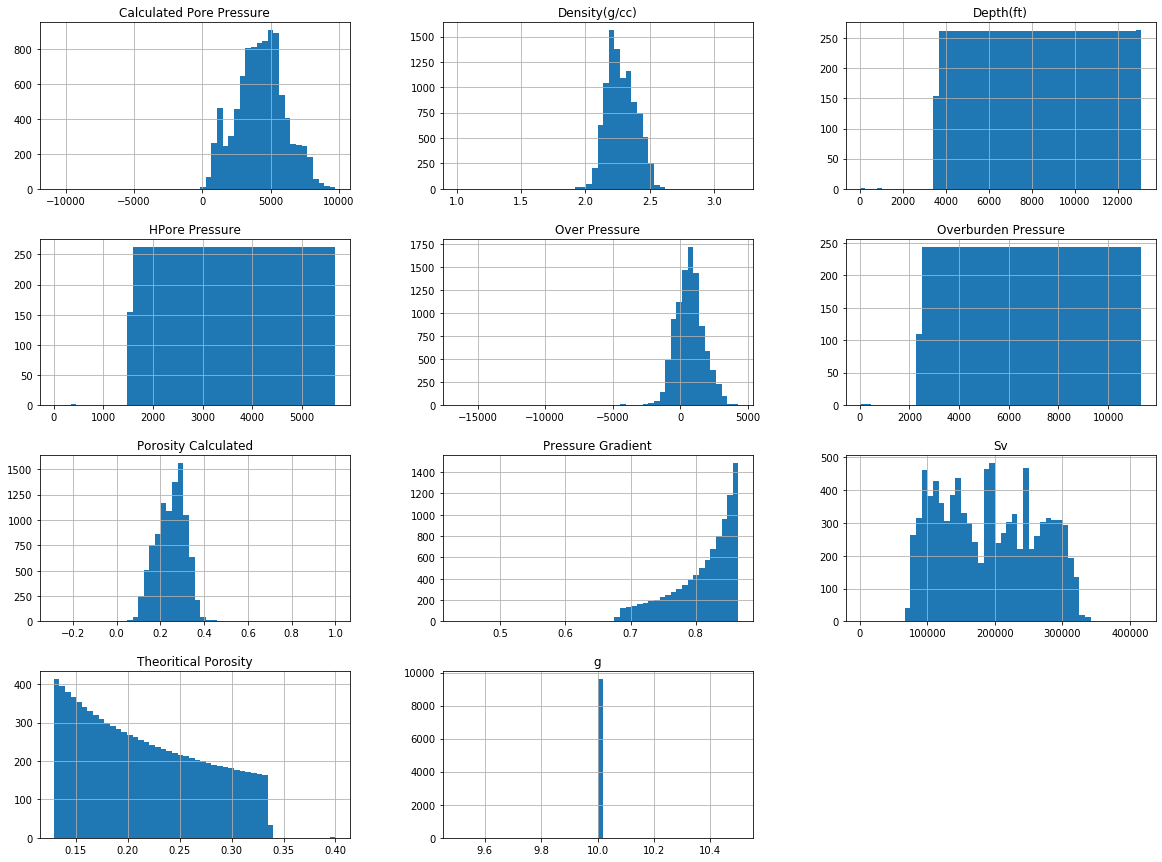

In [15]:
dataset.hist(bins = 50, figsize=(20,15))
save.fig('well_log_attribute')
plt.show

In [ ]:
from pandas.plotting import scatter_matrix
attribute =['HPore Pressure', 'Pressure Gradient', 'Over Pressure', 'Calculated Pore Pressure']
scatter_matrix(dataset[attribute], figsize=(12, 8))

In [ ]:
#dataset.plot(kind='scatter', x='Calculated Pore Pressure', y='Theoritical Porosity', alpha=0.8)

In [ ]:
#g = sns.pairplot(dataset)

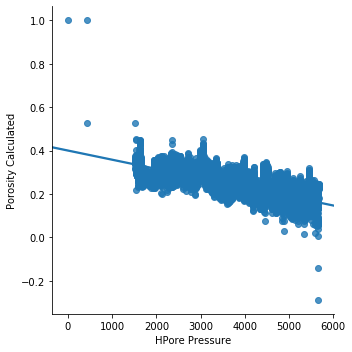

In [16]:
sns.lmplot('HPore Pressure', 'Porosity Calculated', dataset)

# Machine Learning Procedure

In [17]:
import sklearn
from sklearn.model_selection import train_test_split

In [18]:
X = dataset.iloc[:, :-6].values
y = dataset.iloc[:, 5].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [20]:
X.shape

(9590, 5)

In [21]:
y.shape

(9590,)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
y_pred

array([ 8975.23837022,  5341.87145316, 11032.68492988, ...,
        2668.94364991,  8651.44068985, 10722.77483528])

In [29]:
y_test

array([ 8977.32213624,  5343.49969691, 11024.73005403, ...,
        2657.79323045,  8654.44012185, 10722.37810993])

In [32]:
from sklearn.metrics import mean_squared_error

X_prediction = regressor.predict(X_train)
lin_mse = mean_squared_error(y_train, X_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.269375908448787

In [33]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, X_predictions)
lin_mae

3.861056408614316

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [36]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 1.9390741   1.71205384  1.82475166  1.76860511  1.99372901 70.77843666
 70.78584735  1.6106945   1.73686415 15.77728897]
Mean: 16.992734535387424
Standard deviation: 27.210936526341122


In [38]:
scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      8.714567
std       7.525421
min       5.081003
25%       5.267830
50%       5.385165
75%       7.881788
max      29.060394
dtype: float64

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

ValueError: continuous is not supported